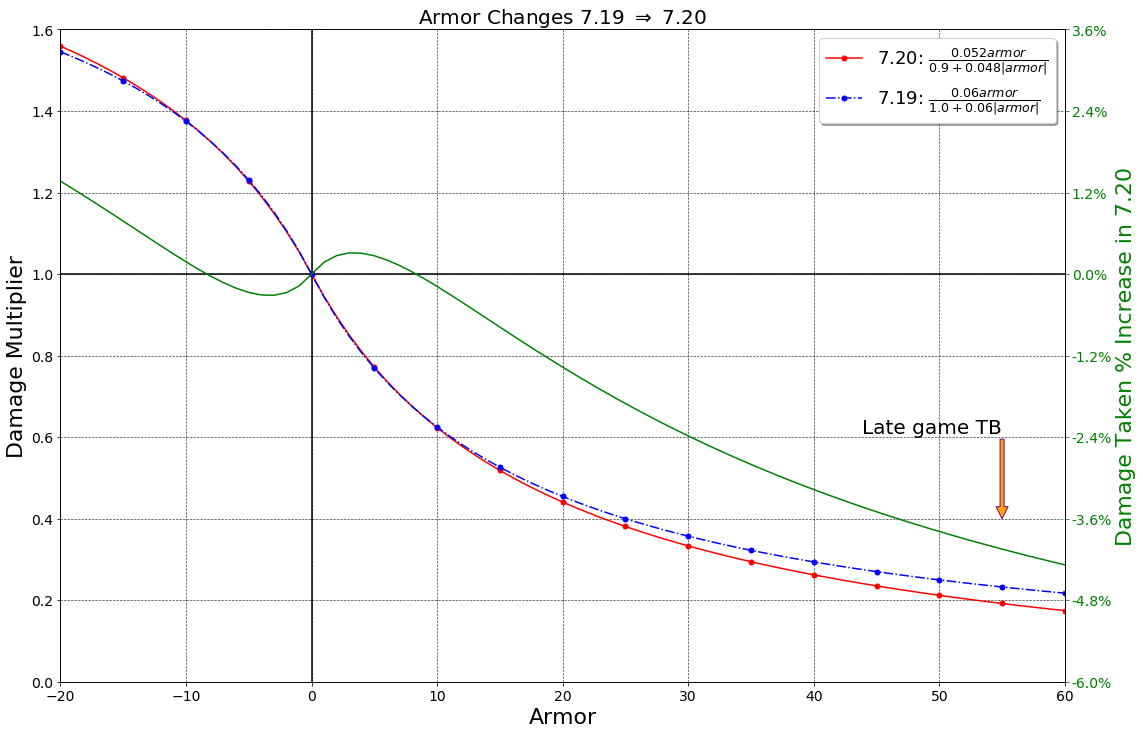

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# symbols! https://matplotlib.org/users/mathtext.html

def dmg_redux_new(armor):
    return 1-(0.052*armor)/(0.9 + 0.048*abs(armor))
    #return (0.052*armor)/(0.9 + 0.048*abs(armor))

def dmg_redux_old(armor):
    return 1-((0.06*armor)/(1+0.06*abs(armor)))

def dmg_redux_new_pct(armor):
    return 100.0*dmg_redux_new(armor)

def dmg_redux_old_pct(armor):
    return 100.0*dmg_redux_old(armor)


minArmor = -20
maxArmor = 60
minDmgMult = 0.0
maxDmgMult = 1.6
armorRange = np.arange(minArmor, maxArmor+1)


fig = plt.figure(figsize=(18,12))
axLeft = fig.add_subplot(111)
plt.grid(True)

# thick lines going through 'origin'
plt.axvline(0.0, color='black')
plt.axhline(1.0, color='black')

# plot the damage taken vs armor data
line720, = axLeft.plot(armorRange, dmg_redux_new(armorRange), color='red', linestyle='-', marker='.', markersize=10, markerfacecolor='red', markevery=5)
line719, = axLeft.plot(armorRange, dmg_redux_old(armorRange), color='blue', linestyle='-.', marker='.', markersize=10, markerfacecolor='blue', markevery=5)

# the arrow+text. ha/va=(horizontal/vertical)alignment *alignment seems to be broken for some arrow styles*  ec/fc = (edge/face)color of the arrow
# size is text font size. xy is the endpoint of the arrow.  xytext is the start point of the arrow and/or the text (combines with the alignment)
axLeft.annotate('Late game TB', size=20, xy=(55,.4), xycoords='data', xytext=(55,.6), ha='right', va='bottom', arrowprops={'ec':'purple', 'fc':'orange'}) # availabiltiy changes in recent pyplot versions?:  'width':3,  ,'arrowstyle':'-|>'

# format ticks, labels, axes, grid
axLeft.set_ylim([minDmgMult,maxDmgMult])
axLeft.set_xlim([minArmor,maxArmor])
axLeft.set_ylabel('Damage Multiplier', color='black', fontsize=22)  # (1.0 is No Reduction)
axLeft.set_xlabel('Armor', color='black', fontsize=22)
axLeft.tick_params('both', colors='black', labelsize=14, grid_color='black', grid_linestyle='--', grid_linewidth=.66, grid_alpha=.8)

# create
line720.set_label(r'7.20: $\frac{0.052 armor}{0.9+0.048|armor|}$')
line719.set_label(r'7.19: $\frac{0.06 armor}{1.0+0.06|armor|}$')
axLeft.legend(loc='upper right', fontsize=18, fancybox=True, shadow=True)

# the twinx makes this a 2-axis plot, different scale on right
axRight = axLeft.twinx()
axRight.plot(armorRange, 100.0*(dmg_redux_new(armorRange) - dmg_redux_old(armorRange)), color='green')
axRight.set_ylabel('Damage Taken % Increase in 7.20', color='green', fontsize=22)  # (<0 is Reduced Damage)
axRight.tick_params('y', colors='green', labelsize=14)

#make ticks and crosslines on each side line up and intersect at
#  [zeroRight-minRight / maxRight-zeroRight] = [zeroleft-minLeft / minLeft-zeroLeft]  :  zeroRight = 1.0, zeroLeft = 0.0  #f(0_armor) 
yMinRight = -6.0
yMaxRight = (0-yMinRight)/((1.0-minDmgMult)/(maxDmgMult-1.0))  #math 
axRight.set_ylim([yMinRight, yMaxRight])  
axRight.set_yticks(np.linspace(yMinRight, yMaxRight, 9))
axRight.set_yticklabels(['{:.1f}%'.format(v) for v in axRight.get_yticks()])

axLeft.set_title(r'Armor Changes 7.19 $\Rightarrow$ 7.20', fontsize=20)
#fig.suptitle("Armor Changes 7.19 --> 7.20", fontsize=20)  #displays higher/padded above plot, at least by default

#call savefig before plt.show(). It figures out the format from the file name/extension
fig.savefig('../output/armor720.svg', bbox_inches='tight')
#fig.savefig('../output/armor720.png', bbox_inches='tight', dpi=150)

plt.show()